In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

In [2]:
bond_prices_monthly = pd.read_csv("../Datasets/Bond Prices/IRLTLT01USMonthly156N.csv")

In [3]:
bonds_after2007 = bond_prices_monthly[565:]
#bonds_after2007['DATE'] = bonds_after2007['DATE'].apply(lambda x: float(x.split()[0].replace('-', '')))
#bonds_after2000 = bond_prices_monthly.loc[480:,:0], axis=0
bonds_after2007 = bonds_after2007.drop("DATE", axis=1)
bonds_after2007.reset_index(drop=True, inplace=True)
bonds_after2007.to_excel("Bond prices monthly from 01.02.2007 onwards.xlsx")
bonds_after2007

,IRLTLT01USM156N
0,4.72
1,4.56
2,4.69
3,4.75
4,5.10
...,...
182,2.75
183,2.90
184,3.14
185,2.90


In [4]:
ohcounties = pd.read_excel("../Final Data Ohio/1 ohio counties dataset from pandas_copy copy.xlsx", index_col=0)
#ohcounties['Date'] = ohcounties['Date'].apply(lambda x: float(x.split()[0].replace('-', '')))
ohcounties = ohcounties.drop("Date", axis=1)
#ohcounties = ohcounties.drop(ohcounties.loc[:, "Cuyahoga":"Miami .1"], axis=1)
ohcounties

,Franklin,Cuyahoga,Hamilton,Summit,Montgomery,Lucas,Butler,Stark,Lorain,Mahoning,...,Van Wert,Pike,Henry,Wyandot,Paulding,Harrison,Clinton,Logan .1,Holmes .1,Miami .1
0,154827,144623,155213,137387,119599,102090.0,163089,122700,156782,94540.0,...,75034,89464,105401.0,98593,83727.0,65704,121612.0,120267.0,136911,144472.0
1,154366,143933,155098,137488,119561,102351.0,163166,122822,155733,94662.0,...,75032,89151,105387.0,98453,83540.0,65393,121601.0,120132.0,136819,144335.0
2,154100,143030,155274,137052,119627,102539.0,163075,122931,155161,94500.0,...,74963,88690,105380.0,98306,83317.0,65203,121537.0,119990.0,136717,144170.0
3,153849,142255,155310,136598,119334,102417.0,162517,122966,155653,94285.0,...,74838,88058,105208.0,98188,82969.0,65130,121406.0,119860.0,136832,143889.0
4,153623,141876,155103,135969,118819,102044.0,161871,122939,156411,93975.0,...,74646,87448,104958.0,98020,82485.0,65120,121219.0,119616.0,136978,143461.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,270863,190962,233345,190666,163956,143944.0,257166,180310,207921,143094.0,...,130396,140202,165453.0,151684,119598.0,115966,179035.0,184863.0,269585,214409.0
183,275481,194720,236987,193401,166126,145586.0,261836,182347,210276,145432.0,...,130838,140754,165845.0,151918,120106.0,116590,179768.0,185507.0,270265,216285.0
184,278800,196968,239982,196284,167442,147358.0,266359,184000,212910,146850.0,...,131284,141184,166278.0,152621,120633.0,117145,180646.0,186160.0,270963,217528.0
185,281801,198809,241494,198679,168329,149035.0,269788,185498,215816,148386.0,...,132626,142491,167722.0,154333,121799.0,118549,182781.0,188283.0,273615,219074.0


In [5]:
Franklin = ohcounties["Franklin "].copy()
Franklin

0      154827
1      154366
2      154100
3      153849
4      153623
        ...  
182    270863
183    275481
184    278800
185    281801
186    284115
Name: Franklin , Length: 187, dtype: int64

# Generate Training and Test Data Sets

In [6]:
X, y = bonds_after2007, Franklin

In [43]:
#X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15)

In [44]:
forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
print("model score on training data:", forest.score(X_train, y_train))
print("model score on test data:", forest.score(X_test, y_test))

model score on training data: 0.6791532230845136
model score on test data: 0.2556130144099207


In [33]:
sns.set_context("paper")

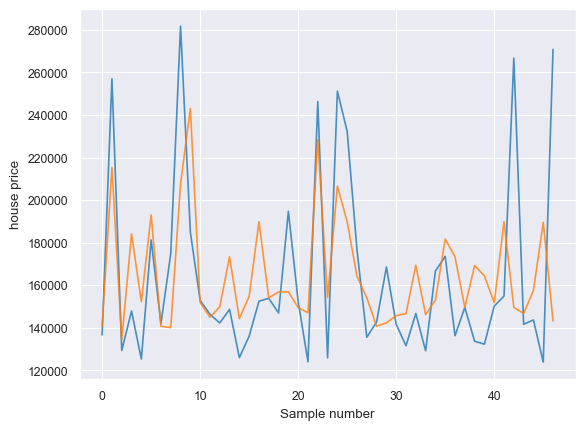

In [12]:
fig,ax = plt.subplots()
plt.plot(y_test.to_numpy(), alpha = 0.8,label=r"observed price")
plt.plot(forest.predict(X_test), alpha=0.8, label=r"predicted price")

#always label your axes
plt.xlabel(r"Sample number")
plt.ylabel(r"house price")

# create a legend
#plt.savefig("House_price_regression.png", dpi=600)
#sns.despine()
plt.show()